In [89]:
import random
from numpy.random import seed as np_seed
from random import randint

In [90]:
np_seed(42)
random.seed(42)

In [91]:
def generate_x_value():
    return randint(500,2000)

def generate_y_value():
    return randint(20,50)

In [92]:
x_values = []

for _ in range(0, 100):
    x_values.append(generate_x_value())
    
x_values[0:5]

[1809, 728, 551, 1063, 1001]

In [93]:
y_values = []

for _ in range(0, 100):
    y_values.append(generate_y_value())
    
y_values[0:5]

[27, 41, 30, 46, 44]

In [94]:
x2_values = list(map(lambda x: x * 2 + 7000, x_values))
x2_values[0:5]

[10618, 8456, 8102, 9126, 9002]

In [95]:
x3_values = list(map(lambda x: x * 3 - 20, x_values))
x3_values[0:5]

[5407, 2164, 1633, 3169, 2983]

In [96]:
y2_values = list(map(lambda y: y * 2 + 1000, y_values))
y2_values[0:5]

[1054, 1082, 1060, 1092, 1088]

In [97]:
import pandas as pd

df = pd.DataFrame({
    "x": x_values,
    "x2": x2_values,
    "x3": x3_values,
    "y": y_values,
    "y2": y2_values
})

df

,x,x2,x3,y,y2
0,1809,10618,5407,27,1054
1,728,8456,2164,41,1082
2,551,8102,1633,30,1060
3,1063,9126,3169,46,1092
4,1001,9002,2983,44,1088
...,...,...,...,...,...
95,1277,9554,3811,44,1088
96,1052,9104,3136,25,1050
97,1810,10620,5410,36,1072
98,1909,10818,5707,49,1098


In [98]:
import numpy as np

In [99]:
df["label"] = (df.x > 1000) & (df.y > 35)
df['label'] = df['label'].apply(lambda x: 1 if x else 0)
df

,x,x2,x3,y,y2,label
0,1809,10618,5407,27,1054,0
1,728,8456,2164,41,1082,0
2,551,8102,1633,30,1060,0
3,1063,9126,3169,46,1092,1
4,1001,9002,2983,44,1088,1
...,...,...,...,...,...,...
95,1277,9554,3811,44,1088,1
96,1052,9104,3136,25,1050,0
97,1810,10620,5410,36,1072,1
98,1909,10818,5707,49,1098,1


In [100]:
df["keep"] = ((df.x > 1000) & (df.y > 35)) | ((df.x < 800) & (df.y < 30))
df

,x,x2,x3,y,y2,label,keep
0,1809,10618,5407,27,1054,0,False
1,728,8456,2164,41,1082,0,False
2,551,8102,1633,30,1060,0,False
3,1063,9126,3169,46,1092,1,True
4,1001,9002,2983,44,1088,1,True
...,...,...,...,...,...,...,...
95,1277,9554,3811,44,1088,1,True
96,1052,9104,3136,25,1050,0,False
97,1810,10620,5410,36,1072,1,True
98,1909,10818,5707,49,1098,1,True


In [101]:
df = df[df.keep]
df.head()

,x,x2,x3,y,y2,label,keep
3,1063,9126,3169,46,1092,1,True
4,1001,9002,2983,44,1088,1,True
6,785,8570,2335,21,1042,0,True
7,709,8418,2107,27,1054,0,True
8,1885,10770,5635,46,1092,1,True


In [102]:
del df["keep"]
df.head()

,x,x2,x3,y,y2,label
3,1063,9126,3169,46,1092,1
4,1001,9002,2983,44,1088,1
6,785,8570,2335,21,1042,0
7,709,8418,2107,27,1054,0
8,1885,10770,5635,46,1092,1


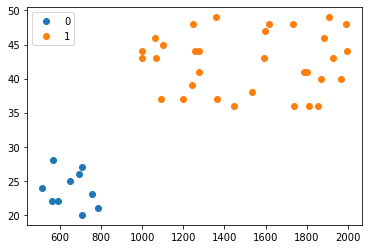

In [103]:
import matplotlib.pyplot as plt

groups = df.groupby("label")

for name, group in groups:
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
    
plt.legend()

In [104]:
!mkdir -p tmp

In [105]:
df.to_csv("tmp/synthetic.all.labeled.csv")

In [106]:
labeled_df = df
%store labeled_df

Stored 'labeled_df' (DataFrame)


In [107]:
del df["label"]
df.head()

,x,x2,x3,y,y2
3,1063,9126,3169,46,1092
4,1001,9002,2983,44,1088
6,785,8570,2335,21,1042
7,709,8418,2107,27,1054
8,1885,10770,5635,46,1092


In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df.astype(float))
normalized_df = pd.DataFrame(scaled_array)
normalized_df.columns = df.columns
normalized_df.index = df.index

display(normalized_df.head())

,x,x2,x3,y,y2
3,0.371371,0.371371,0.371371,0.896552,0.896552
4,0.329507,0.329507,0.329507,0.827586,0.827586
6,0.183660,0.183660,0.183660,0.034483,0.034483
7,0.132343,0.132343,0.132343,0.241379,0.241379
8,0.926401,0.926401,0.926401,0.896552,0.896552


In [109]:
normalized_df.to_csv("tmp/synthetic.all_normalized.unlabeled.csv")

In [110]:
unlabeled_normalized_df = normalized_df
%store unlabeled_normalized_df

Stored 'unlabeled_normalized_df' (DataFrame)
